## Generating profile using rule - “People between the age 10 and 35 who have Asthma”.

In [1]:
profile = {'profile1' : "People between the ages 10-35 who have Asthma"}

### Building generation_rule_set function.

In [2]:
import pandas as pd
import numpy as np
from itertools import cycle


# Setting intervals to controls the fake values for each datatype. The intervals will be used to control the values for each data type.
# Float type data will be generated within range 0 and 100 if any is used in profile generation. If any date field is required, that will be created between "2022-01-01" & "2022-12-31".
    
# i : integer , f : float, c : categorical and d : date type data.
# Age is an integer value and the range is specified with lower value = 10 and upper value = 60 which is mentioned in the profile. 
default_intervals = {"i" : (10, 60), "f" : (0, 100), "c" : ("names", 15), "d" : ("2022-01-01", "2022-12-31")}

def generation_rule_set(profile_name, size, cols, col_names = None, intervals = None, seed = None):
    
    """
    The function is creating the rules for generating fake profiles.
    
    Parameters
    ------------
    # Creating a dictionary and initializing it with the desired rules for generating disease, 
    names, cities & age rules which will be used for profiles.
    
    profile_name : string
        The name of the profile to be generated as per the specific rule.
        
    size : integer
        The number of profiles to be generated.
        
    cols : string 
        Value passed "ciccd" which is the data types of the columns mentioned in order.
        c : category - used for names, diseases, cities.
        i : integer - used for age.
        d : date - used for date of last tested.
        
    
    col_names = list
        default is set to None. The list of column names will be stored here.
        
    intervals
        default is set to None. Setting intervals to controls the fake values for each datatype.
        The intervals will be used to control the values for each data type.
        
    seed = integer
        default is set to None. Used for random number generation.
    
    """

    categories_dict = {'disease': ['liver_issue', 'dementia', 'cancer', 'heart_disease', 'asthma', 'diabetes', 'mental_health', 'lung_cancer','cold'],
                       'names'  : ['james', 'mary', 'robert', 'patricia', 'john', 'jennifer', 'michael', 'linda', 'william', 'elizabeth', 'ahmed', 'barbara', 'richard', 'susan', 'salomon', 'juan'],
                       'cities' : ['new_south_wales', 'victoria', 'queensland', 'south_australia', 'western_australia', 'tasmania', 'northern_territory', 'capital_territory'], 
                       'age' : [35, 11, 23, 32, 10, 15, 18, 29, 25, 28 ,16, 14, 14 ,23 ,32]
                      }
    
    # Random values are created for integer type feature.
    rng = np.random.default_rng(seed)

    # First category is created.
    first_c = default_intervals["c"][0]

    # Categorical variables will be repeated after 15 intervals.
    categories_names = cycle([first_c] + [c for c in categories_dict.keys() if c != first_c])
    default_intervals["c"] = (categories_names, default_intervals["c"][1])

    # Check the length of profile template and  print error if new instance of profile exceeds the length. If the new instance does not
    # have the column name, below 'else' block will create the default column name with respective data type suffix with the numeric position
    # derived from enumerate function.
    if isinstance(col_names, list):
        assert len(col_names) == len(cols), f"The fake data_frame should have {len(cols)} columns but col_names is a list with {len(col_names)} elements."

    elif col_names is None:
        suffix = {"c" : "cat", "i" : "int", "f" : "float", "d" : "date"}
        col_names = [f"column_{str(i)}_{suffix.get(col)}" for i, col in enumerate(cols)]

    # Checking the interval length and key values. If specific intervals are defined during profile creation use that
    # otherwise use the default interval.
    if isinstance(intervals, list):
        assert len(intervals) == len(cols), f"The fake data_frame should have {len(cols)} columns but intervals is a list with {len(intervals)} elements."

    else:
        if isinstance(intervals, dict):
            assert len(set(intervals.keys()) - set(default_intervals.keys())) == 0, f"The intervals parameter has invalid keys"
            default_intervals.update(intervals)
        
        intervals = [default_intervals[col] for col in cols]      
    df = pd.DataFrame()
    
    # Building the fake profile dataframe and return to main function.
    for col, col_name, interval in zip(cols, col_names, intervals):
        
        if interval is None:
            interval = default_intervals[col]
        assert (len(interval) == 2 and isinstance(interval, tuple)) or isinstance(interval, list), f"This interval {interval} is neither a tuple of two elements nor a list of strings."
        
        if col in ("i", "f", "d"):
            start, end = interval
        
        if col == "i":
            df[col_name] = rng.integers(start, end, size)
        
        elif col == "f":
            df[col_name] = rng.uniform(start, end, size)
        
        elif col == "c":
            
            if isinstance(interval, list):
                categories = np.array(interval)
            else:
                cat_family, length = interval
                
                if isinstance(cat_family, cycle):
                    cat_family = next(cat_family)

                assert cat_family in categories_dict.keys(), f"There are no samples for category '{cat_family}'. Consider passing a list of samples or use one of the available categories: {categories_dict.keys()}"
                categories = rng.choice(categories_dict[cat_family], length, replace = True, shuffle = True)
            
            df[col_name] = rng.choice(categories, size, shuffle = True)    
        elif col == "d":
            df[col_name] = rng.choice(pd.date_range(start, end), size)
    
    return df


### Building Specific Profile.

In [3]:
# For testing, profile1 is set to run without manual input.
profile_name = 'profile1'

# The column/feature orders are passed as parameter when we call the function generation_rule_set(profile_name, size = 50000, cols = "ciccd").
df_profile = generation_rule_set(profile_name, size = 50000, cols = "ciccd")

print("***************** Here, is the generic profile data. *****************" + "\n")

if profile[profile_name] == 'People between the ages 10-35 who have Asthma':
    df_profile.rename(columns = {'column_0_cat':'name', 'column_1_int':'age', 'column_2_cat':'disease', 'column_3_cat':'city', 'column_4_date':'last_tested'}, inplace = True)
    print(df_profile)
    print()
    print("------------ Statistical Distribution of Generic Profile. ------------")
    print()
    print(df_profile.describe())
else:
    print('Profile did not match.')

***************** Here, is the generic profile data. *****************

           name  age        disease                city last_tested
0          juan   57         cancer          queensland  2022-11-17
1         ahmed   14  mental_health          queensland  2022-06-11
2          john   10    liver_issue  northern_territory  2022-08-21
3         linda   31    liver_issue          queensland  2022-09-02
4          john   40           cold          queensland  2022-04-30
...         ...  ...            ...                 ...         ...
49995     ahmed   32         cancer     new_south_wales  2022-04-18
49996  jennifer   41  mental_health     south_australia  2022-03-18
49997      john   52  mental_health          queensland  2022-07-27
49998   barbara   14  mental_health            victoria  2022-12-17
49999     ahmed   28         cancer   western_australia  2022-11-28

[50000 rows x 5 columns]

------------ Statistical Distribution of Generic Profile. ------------

             

### Checking asthma patients.

In [4]:
print("To build data for", profile[profile_name], ": Checking the count of various patient groups" + ".\n")
df_profile['disease'].value_counts()

To build data for People between the ages 10-35 who have Asthma : Checking the count of various patient groups.



cancer           13366
mental_health    10016
cold              6682
lung_cancer       6612
liver_issue       3400
asthma            3383
dementia          3274
diabetes          3267
Name: disease, dtype: int64

### People between the ages 10-35 who have Asthma.

In [5]:
# Asthma dataframe between age 10 to 35.
df_asthma_profile = df_profile[(df_profile['age'] >= 10) & (df_profile['age'] <= 35) & (df_profile['disease'] == 'asthma')]
print("People between the ages 10-35 who have Asthma:", df_asthma_profile.shape)
print()
print(df_asthma_profile)

People between the ages 10-35 who have Asthma: (1763, 5)

           name  age disease                city last_tested
15        linda   18  asthma     south_australia  2022-07-13
24         john   30  asthma  northern_territory  2022-02-22
34     jennifer   35  asthma            tasmania  2022-11-29
67     patricia   29  asthma          queensland  2022-12-17
70      william   18  asthma          queensland  2022-01-29
...         ...  ...     ...                 ...         ...
49844      john   33  asthma            victoria  2022-09-13
49881   william   18  asthma   western_australia  2022-10-30
49901      john   34  asthma          queensland  2022-06-18
49923     ahmed   27  asthma          queensland  2022-03-21
49934  jennifer   12  asthma          queensland  2022-01-26

[1763 rows x 5 columns]


### Plot the distribution of values in the age column using a histogram - Random distribution.


Distribution of values in age of asthma patients.



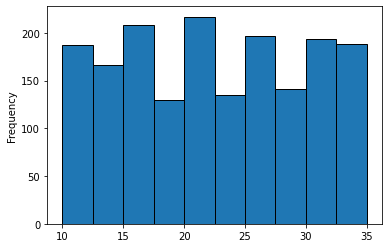

In [6]:
# Plot distribution of values in points column using histogram.
print("\n" + "Distribution of values in age of asthma patients" + ".\n")
df_asthma_profile['age'].plot(kind = 'hist', edgecolor = 'black')

### Building Triangular distribution.

In [7]:
# Generating asthma dataframe from the profile dataframe.
df_asthma = df_profile[(df_profile['disease'] == 'asthma')]
print("People who have Asthma:", df_asthma.shape)
print()

df_asthma.reset_index(drop = True, inplace = True)
print(df_asthma)

People who have Asthma: (3383, 5)

          name  age disease                city last_tested
0        linda   18  asthma     south_australia  2022-07-13
1         juan   46  asthma          queensland  2022-06-04
2         john   30  asthma  northern_territory  2022-02-22
3     jennifer   35  asthma            tasmania  2022-11-29
4        ahmed   36  asthma  northern_territory  2022-10-02
...        ...  ...     ...                 ...         ...
3378      john   34  asthma          queensland  2022-06-18
3379      john   38  asthma          queensland  2022-09-18
3380     ahmed   27  asthma          queensland  2022-03-21
3381  jennifer   12  asthma          queensland  2022-01-26
3382     ahmed   37  asthma     south_australia  2022-05-24

[3383 rows x 5 columns]


### Applying formula of Triangular Distribution, to make it a triangle, a high count of Asthma patients at a higher age is required.

People who have Asthma: 3383

Min Age have Asthma: 10
Max age have Asthma: 59



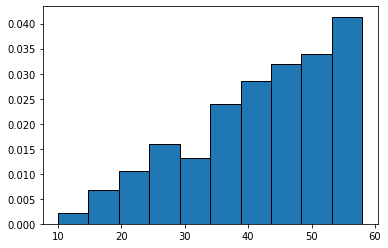

In [8]:
print("People who have Asthma:", df_asthma.shape[0])
print()
print("Min Age have Asthma:", df_asthma['age'].min())
print("Max age have Asthma:", df_asthma['age'].max())
print()

# Here, is the distribution rule for Triangular distribution applied on Age column which was random in earlier part.
tri_distribution = np.random.triangular(df_asthma['age'].min(), df_asthma['age'].max(), df_asthma['age'].max(), df_asthma.shape[0])
tri_distribution = tri_distribution.astype(int)

import matplotlib.pyplot as plt
plt.hist(tri_distribution, bins = 10, density = True, edgecolor = 'black')
plt.show()

Now we see Min Age have Asthma: 10 and Max age have Asthma: 59, with this the distribution is triangular.